# 빅데이터분석 특강 중간고사

In [2]:
import numpy as np
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [3]:
tnp.experimental_enable_numpy_behavior()

In [4]:
import matplotlib.pyplot as plt 

## `1`. 경사하강법과 tf.GradientTape()의 사용방법 (30점)

`(1)` 아래는 $X_i \overset{iid}{\sim} N(3,2^2)$ 를 생성하는 코드이다. 

In [5]:
tf.random.set_seed(43052)
x= tnp.random.randn(10000)*2+3
x

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([ 4.12539849,  5.46696729,  5.27243374, ...,  2.89712332,
        5.01072291, -1.13050477])>

함수 $L(\mu,\sigma)$을 최대화하는 $(\mu,\sigma)$를 `tf.GradeintTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $\mu$의 초기값은 2로 $\sigma$의 초기값은 3으로 설정할 것) 

$$L(\mu,\sigma)=\prod_{i=1}^{n}f(x_i), \quad f(x_i)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$$

$\log L = \log \prod_{i=1}^{n}f(x_i) $

$= \sum^{10000}_{i=1} \big \{ -\frac{1}{2} \log(2\pi \sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \big \}$

$= \frac{10000}{2}\log (2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum^{10000}_{i=1} (x_i - \mu)^2$

L이 최대가 된다는 것은 $e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$가 최대가 된다는 뜻이고, 이는 $\frac{x_i-\mu}{\sigma}$가 최소가 된다는 뜻 $\to$ 경사하강법

In [6]:
mu = tf.Variable(2.0)
sigma = tf.Variable(3.0)

In [10]:
y = ((x-3)**2)/(2*2**2)+(tnp.linspace(0,1,10000)*0.5).reshape(10000,1)

In [11]:
x = x.reshape(10000,1)
y = y.reshape(10000,1)

In [12]:
for epoc in range(1000):
    with tf.GradientTape() as tape: 
        yhat = ((x-mu)**2)/(2*(sigma)**2)
        loss = tf.reduce_mean((y-yhat)**2)
    slope0,slope1 = tape.gradient(loss,[mu,sigma])
    mu.assign_sub(0.1*slope0)
    sigma.assign_sub(0.1*slope1)

In [13]:
mu,sigma

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0002534>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.849885>)

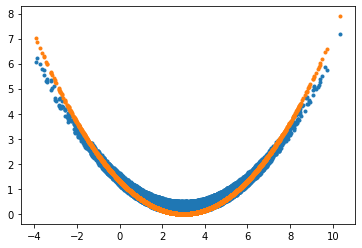

In [14]:
plt.plot(x,y,'.')
plt.plot(x,(((x-mu)**2)/(2*sigma**2)),'.')

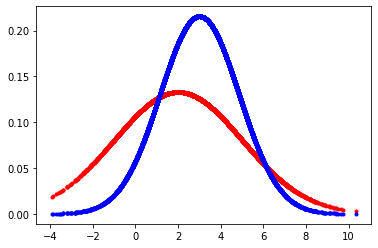

In [15]:
plt.plot(x,1/np.sqrt(2*np.pi*3**2)*np.exp(-((x-2)**2)/(2*3**2)),'.r')
plt.plot(x,1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2)),'.b')

`(2)` 아래는 $X_i \overset{iid}{\sim} Ber(0.8)$을 생성하는 코드이다. 

In [16]:
tf.random.set_seed(43052)
x= tf.constant(np.random.binomial(1,0.8,(10000,)))
x

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([1, 1, 0, ..., 0, 1, 1])>

함수 $L(p)$을 최대화하는 $p$를 `tf.GradeintTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $p$의 초기값은 0.3으로 설정할 것) 


$$L(p)=\prod_{i=1}^{n}f(x_i), \quad f(x_i)=p^{x_i}(1-p)^{1-x_i}$$

In [20]:
N=10000

In [21]:
p_hat = tf.Variable(0.3)

In [22]:
y = x/N-p_hat

In [23]:
y = y.reshape(-1)

In [24]:
y = y + tnp.random.randn(N)*0.5

In [25]:
opt = tf.keras.optimizers.SGD(0.1)

In [26]:
loss_fn = lambda: tf.reduce_mean((y-(x/N-p_hat))**2)

In [27]:
for epoc in range(30):
    opt.minimize(loss_fn, p_hat)

In [28]:
p_hat

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.29590464>

`(3)` 아래의 모형에 따라서 $\{Y_i\}_{i=1}^{10000}$를 생성하는 코드를 작성하라. 
- $Y_i \overset{iid}{\sim} N(\mu_i,1)$ 
- $\mu_i = \beta_0 + \beta_1 x_i = 0.5 + 2 x_i$ , where $x_i = \frac{i}{10000}$

함수 $L(\beta_0,\beta_1)$을 최대화하는 $(\beta_0,\beta_1)$를 `tf.GradeintTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $\beta_0,\beta_1$의 초기값은 모두 1로 설정할 것) 

$$L(\beta_0,\beta_1)=\prod_{i=1}^{n}f(y_i), \quad f(y_i)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(y_i-\mu_i)^2}, \quad \mu_i=\beta_0+\beta_1 x_i$$

In [29]:
np.random.seed(43052)
N=10000
x = tnp.array(list(range(1,10001)))/N
y= 0.5 + x*2.0+np.random.normal()**0/5
y

<tf.Tensor: shape=(10000,), dtype=float64, numpy=array([0.7002, 0.7004, 0.7006, ..., 2.6996, 2.6998, 2.7   ])>

L이 최대가 된다는 것은 $e^{-\frac{1}{2}(\frac{y_i-\beta_0+\beta_1*x_i}{\sigma})^2}$가 최대가 된다는 뜻이고, 이는 $\frac{y_i-\beta_0 - \beta_1 x_i}{\sigma}$=${y_i-\beta_0 - \beta_1 x_i}$가 최소가 된다는 뜻 $\to$ 경사하강법

In [30]:
y = y.reshape(N,1)
X = tf.stack([tf.ones(N,dtype=tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([1.0,1.0]).reshape(2,1))

In [31]:
alpha = 0.1
opt = tf.keras.optimizers.SGD(alpha)

In [32]:
def loss_fn():
    return ( (y-X@beta_hat).T @ (y-X@beta_hat) ) /N

In [33]:
for oepoc in range(10000):
        opt.minimize(loss_fn,beta_hat)

In [34]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[0.7],
       [2. ]])>

## `2`. 회귀분석의 이론적해와 tf.keras.optimizer 이용방법 (20점)

아래와 같은 선형모형을 고려하자. 

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i.$$

이때 오차항은 정규분포로 가정한다. 즉 $\epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$라고 가정한다. 

관측데이터가 아래와 같을때 아래의 물음에 답하라. 

In [35]:
x= tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
y= tnp.array([55.4183651 , 58.19427589, 61.23082496, 62.31255873, 63.1070028 , 
              63.69569103, 67.24704918, 71.43650092, 73.10130336, 77.84988286])
# X= tnp.array([[1.0, 20.1], [1.0, 22.2], [1.0, 22.7], [1.0, 23.3], [1.0, 24.4],
#               [1.0, 25.1], [1.0, 26.2], [1.0, 27.3], [1.0, 28.4], [1.0, 30.4]])

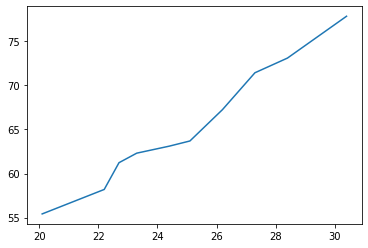

In [36]:
plt.plot(x,y)

`(1)` MSE loss를 최소화 하는 $\beta_0,\beta_1$의 해석해를 구하라. 

In [37]:
X = tf.stack([tf.ones(10,dtype=tf.float64),x],axis=1)

In [38]:
y = y.reshape(10,1)

In [40]:
beta_opt = tf.linalg.inv(X.T @ X) @ X.T @ y
beta_opt

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.94457323],
       [2.21570461]])>

- $\beta_0$ ,$\beta_1$의 해석해는 위와 같았다.

`(2)` 경사하강법과 MSE loss의 도함수를 이용하여 $\beta_0,\beta_1$을 추정하라. 

**주의** tf.GradeintTape()를 이용하지 말고 MSE loss의 해석적 도함수를 사용할 것.

In [41]:
beta_hat = tf.Variable(tnp.array([10.0,3.0]).reshape(2,1))
alpha=0.0015
for epoc in range(1000):
    slope = ( -2 * X.T @ y + 2 * X.T @ X @ beta_hat) /  10
    beta_hat = beta_hat - alpha * slope
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.96804222],
       [2.2147792 ]])>

`(3)` `tf.keras.optimizers`의 `apply_gradients()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

In [42]:
beta_hat = tf.Variable(tnp.array([10.0,3.0]).reshape(2,1))
alpha=0.0015
opt = tf.keras.optimizers.SGD(alpha)
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat = X@beta_hat
        loss = ((y-yhat).T@(y-yhat) )/10
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.96804222],
       [2.2147792 ]])>

`(4)` `tf.keras.optimizers`의 `minimize()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

In [43]:
beta_hat = tf.Variable(tnp.array([10.0,3.0]).reshape(2,1))
alpha = 0.0015
opt = tf.optimizers.SGD(alpha)
loss_fn = lambda: ((y-X@beta_hat).T @ (y-X@beta_hat))/10
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.96804222],
       [2.2147792 ]])>

In [44]:
beta_hat[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([9.96804222])>

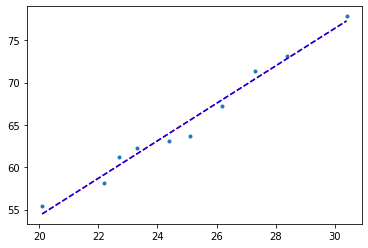

In [45]:
plt.plot(x,y,'.')
plt.plot(x,x*2.21476631+9.96836903,'--r')
plt.plot(x,x*beta_hat[1]+beta_hat[0],'--b')

## `3`. keras를 이용한 풀이 (30점)

`(1)` 아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i, \quad i=0,1,\dots, 999$$

여기에서 $t_i=\frac{2\pi i}{1000}$ 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

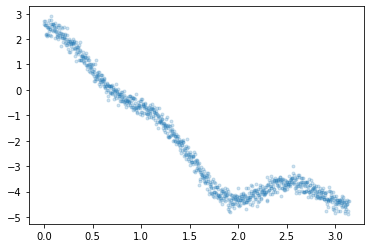

In [46]:
np.random.seed(43052)
t= np.array(range(1000))* np.pi/1000
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.2)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2,3,1,0,0,0.5 이다) 

In [47]:
T = tf.stack([np.ones(1000),np.cos(t),np.cos(2*t),np.cos(3*t),np.cos(4*t),np.cos(5*t)],axis=1)
y = y.reshape(1000,1)

net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1,use_bias=False))
net.compile(tf.optimizers.SGD(0.1),loss = 'mse')
net.fit(T,y,epochs=30,verbose=0,batch_size=1000)
net.weights

[<tf.Variable 'dense/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[-2.0103285 ],
        [ 2.904482  ],
        [ 0.98053974],
        [ 0.03891326],
        [ 0.0101422 ],
        [ 0.48991832]], dtype=float32)>]

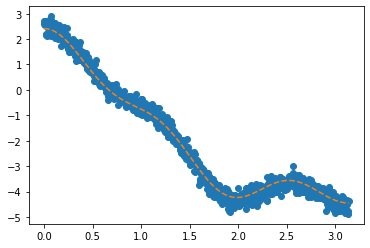

In [48]:
plt.plot(t,y,'o') 
plt.plot(t,(T@net.weights[0]).reshape(-1),'--')

`(2)` 아래와 같은 모형을 고려하자. 

$$y_i \sim Ber(\pi_i), ~ \text{where} ~ \pi_i=\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$$


위의 모형에서 관측한 데이터는 아래와 같다. 

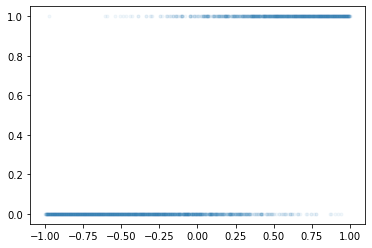

In [49]:
tf.random.set_seed(43052)
x = tnp.linspace(-1,1,2000) 
y = tf.constant(np.random.binomial(1, tf.nn.sigmoid(-1+5*x)),dtype=tf.float64) 
plt.plot(x,y,'.',alpha=0.05)

tf.keras를 이용하여 $w_0,w_1$을 추정하라. (참고: $w_0, w_1$에 대한 참값은 -1과 5이다.) 

In [50]:
x = x.reshape(2000,1)
y = y.reshape(2000,1)

In [51]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))
bceloss_fn = lambda y,yhat: -tf.reduce_mean(y*tnp.log(yhat) + (1-y)*tnp.log(1-yhat))
net.compile(tf.keras.optimizers.SGD(0.1),loss=bceloss_fn)
net.fit(x,y,epochs=10000,batch_size=2000,verbose=0)

In [52]:
net.weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[5.09306]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-1.0963831], dtype=float32)>]

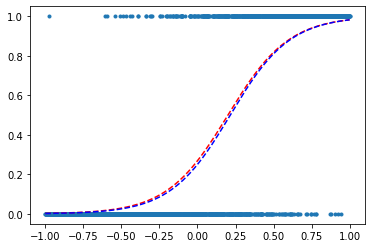

In [53]:
plt.plot(x,y,'.')
plt.plot(x,tf.nn.sigmoid(-1 + x*5) ,'--r')
plt.plot(x,net.predict(x),'--b')

## `4`. Piecewise-linear regression (15점) 

아래의 모형을 고려하자. 

model: $y_i=\begin{cases} x_i +0.3\epsilon_i & x\leq 0 \\ 3.5x_i +0.3\epsilon_i & x>0 \end{cases}$ 

아래는 위의 모형에서 생성한 샘플이다. 

In [54]:
## data 
np.random.seed(43052)
N=100
x= np.linspace(-1,1,N).reshape(N,1)
y= np.array(list(map(lambda x: x*1+np.random.normal()*0.3 if x<0 else x*3.5+np.random.normal()*0.3,x))).reshape(N,1)

`(1)` 다음은 $(x_i,y_i)$를 아래와 같은 아키텍처로 적합시키는 코드이다. 

- $\hat{y} =  \hat{\beta}_0+\hat{\beta}_1x $

In [55]:
tf.random.set_seed(43054) 
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')
net.fit(x,y,batch_size=N,epochs=1000,verbose=0) # numpy로 해도 돌아감

케라스에 의해 추정된 $\hat{\beta}_0,\hat{\beta}_1$을 구하라. 

In [56]:
net.weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.2616348]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.6069048], dtype=float32)>]

`(2)` 다음은 $(x_i,y_i)$를 아래와 같은 아키텍처로 적합시키는 코드이다. 

- $\boldsymbol{u}= x\boldsymbol{W}^{(1)}+\boldsymbol{b}^{(1)}$
- $\boldsymbol{v}= \text{relu}(u)$ 
- $y= \boldsymbol{v}\boldsymbol{W}^{(2)}+b^{(2)}$

In [60]:
tf.random.set_seed(43056) 
## 1단계
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(2))
net.add(tf.keras.layers.Activation('relu')) 
net.add(tf.keras.layers.Dense(1))
net.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')
net.fit(x,y,epochs=1000,verbose=0,batch_size=N)

${\boldsymbol u}$를 이용하여 ${\boldsymbol v}$를 만드는 코드와 ${\boldsymbol v}$를 이용하여 $y$를 만드는 코드를 작성하라. 

In [61]:
net.weights

[<tf.Variable 'dense_5/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[1.9178677, 0.7250776]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.33402327, -0.72684675], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.8141522],
        [-0.6783506]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([-0.600762], dtype=float32)>]

In [62]:
W1 = tf.Variable(tnp.array([[1.9178677, 0.7250776]]))
b1 = tf.Variable(tnp.array([0.33402327, -0.72684675]))
W2 = tf.Variable(tnp.array([[ 1.8141522],[-0.6783506]]))
b2 = tf.Variable(tnp.array([-0.600762]))

In [63]:
u = tf.constant(x) @ W1 + b1
v = tf.nn.relu(u)
yhat = v@W2 + b2

`(3)` 아래는 `(1)-(2)`번 모형에 대한 discussion이다. 올바른 것을 모두 골라라. 

**(곤이)** (2) 모형은 활성화함수로 relu를 사용하였다. 

**(철용)** (1) 모형에서 추정해야할 파라메터의 수는 2개이다. 

**(아귀)** (2) 모형이 (1) 모형보다 복잡한 모형이다. 

**(짝귀)** (1) 의 모형은 오버피팅의 위험이 있다. 

`답`
- 곤이, 철용, 아귀

## `5`. 다음을 잘 읽고 참과 거짓을 판단하라. (5점)

`(1)` 적절한 학습률이 선택된다면, 경사하강법은 손실함수가 convex일때 언제 전역최소해를 찾을 수 있다.

X

`(2)` `tf.GradeintTape()`는 경사하강법을 이용하여 최적점을 찾아주는 tool이다. 

X

`(3)` 학습률이 크다는 것은 파라메터는 1회 업데이트 하는 양이 크다는 것을 의미한다. 

O

`(4)` 학습률이 크면 학습파라메터의 수렴속도가 빨라지지만 때때로 과적합에 빠질 수도 있다. 

O

`(5)` 단순회귀분석에서 MSE loss를 최소화 하는 해는 경사하강법을 이용하지 않아도 해석적으로 구할 수 있다. 

X